In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from scipy.stats import norm

['data2021.csv', 'data2022.csv', 'data2023.csv']
2021: correlation = -0.078
2022: correlation = -0.078
2023: correlation = -0.089


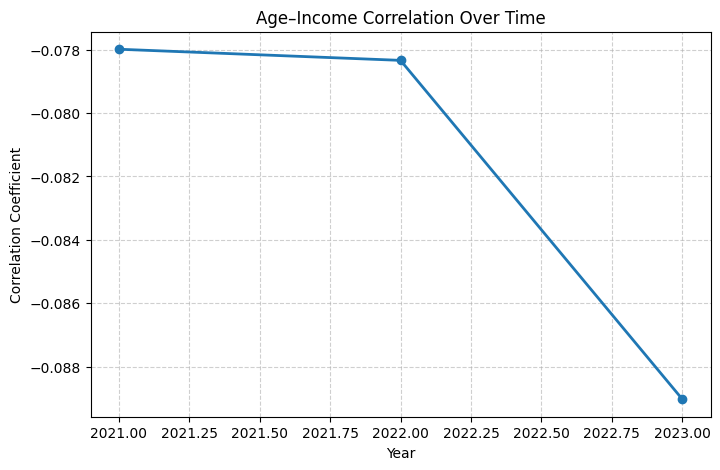

In [6]:
#find files
files = glob.glob("data*.csv")
print(files)

year_corr = []

for file in files:
    #get years
    year = int(re.search(r'(\d{4})', file).group(1))
        # Read the file
    df = pd.read_csv(file)
    
    # make sure columns are numeric
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['income'] = pd.to_numeric(df['household_income'], errors='coerce')
    
    # drop nas
    df = df.dropna(subset=['age', 'household_income'])
    
    # find correlations
    corr = df['age'].corr(df['household_income'])
    
    year_corr.append((year, corr))
    print(f"{year}: correlation = {corr:.3f}")

#create df
corr_df = pd.DataFrame(year_corr, columns=['year', 'correlation']).sort_values('year')

# make plot to show change
plt.figure(figsize=(8,5))
plt.plot(corr_df['year'], corr_df['correlation'], marker='o', linewidth=2)
plt.title('Age–Income Correlation Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


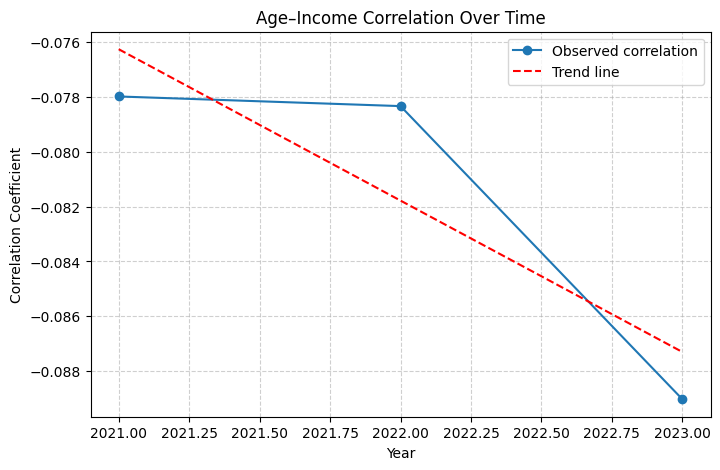

In [7]:
# Fit a simple linear trend line
z = np.polyfit(corr_df['year'], corr_df['correlation'], 1)
p = np.poly1d(z)

plt.figure(figsize=(8,5))
plt.plot(corr_df['year'], corr_df['correlation'], 'o-', label='Observed correlation')
plt.plot(corr_df['year'], p(corr_df['year']), 'r--', label='Trend line')
plt.title('Age–Income Correlation Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [10]:
def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

r1, r2 = corr_df.loc[corr_df['year']==2021, 'correlation'].values[0], corr_df.loc[corr_df['year']==2023, 'correlation'].values[0]
n1, n2 = len(pd.read_csv('data2021.csv')), len(pd.read_csv('data2023.csv'))

z1, z2 = fisher_z(r1), fisher_z(r2)
z = (z1 - z2) / np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Z = {z:.3f}, p = {p_value:.6f}")


Z = 4.055, p = 0.000050
